In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column',None)

In [3]:
df=pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_score
0,flat,vatika city,sector 49,1.69,8622.0,3,3,3,3.0,Moderately Old,2178.0,0,0,0,1,0,0,136
1,flat,pareena coban residences,sector 99a,1.10,7097.0,2,2,3,9.0,New Property,1368.0,1,0,0,0,0,0,88
2,flat,central park resort belgravia residences,sector 48,6.25,24300.0,3,5,3+,5.0,Moderately Old,3200.0,0,1,0,0,0,2,49
3,flat,dlf the ultima,sector 81,2.35,11175.0,3,3,3+,14.0,Relatively New,1550.0,1,1,0,1,1,1,49
4,house,independent,sector 4,0.67,8557.0,3,2,1,1.0,Moderately Old,783.0,0,0,0,1,1,0,19


In [5]:
df.shape

(3546, 18)

In [6]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_score
0,flat,sector 49,1.69,3,3,3,3.0,Moderately Old,2178.0,0,0,0,1,0,0,136
1,flat,sector 99a,1.10,2,2,3,9.0,New Property,1368.0,1,0,0,0,0,0,88
2,flat,sector 48,6.25,3,5,3+,5.0,Moderately Old,3200.0,0,1,0,0,0,2,49
3,flat,sector 81,2.35,3,3,3+,14.0,Relatively New,1550.0,1,1,0,1,1,1,49
4,house,sector 4,0.67,3,2,1,1.0,Moderately Old,783.0,0,0,0,1,1,0,19


# luxaury_score

<Axes: xlabel='luxaury_score'>

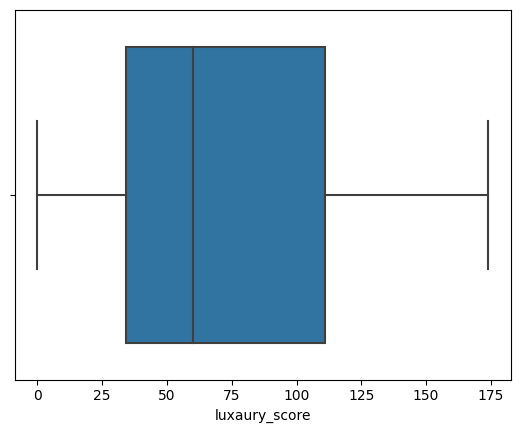

In [8]:
sns.boxplot(x=train_df['luxaury_score'])

In [9]:
def category_luxaury(score):
    if 0 <= score < 50:
        return 'Low'
    elif 50 <= score <150:
        return "Medium"
    elif 150 <= score < 175:
        return 'High'
    else:
        return None

In [10]:
train_df['luxaury_category']=train_df['luxaury_score'].apply(category_luxaury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_score,luxaury_category
0,flat,sector 49,1.69,3,3,3,3.0,Moderately Old,2178.0,0,0,0,1,0,0,136,Medium
1,flat,sector 99a,1.10,2,2,3,9.0,New Property,1368.0,1,0,0,0,0,0,88,Medium
2,flat,sector 48,6.25,3,5,3+,5.0,Moderately Old,3200.0,0,1,0,0,0,2,49,Low
3,flat,sector 81,2.35,3,3,3+,14.0,Relatively New,1550.0,1,1,0,1,1,1,49,Low
4,house,sector 4,0.67,3,2,1,1.0,Moderately Old,783.0,0,0,0,1,1,0,19,Low


# floorNum

<Axes: xlabel='floorNum'>

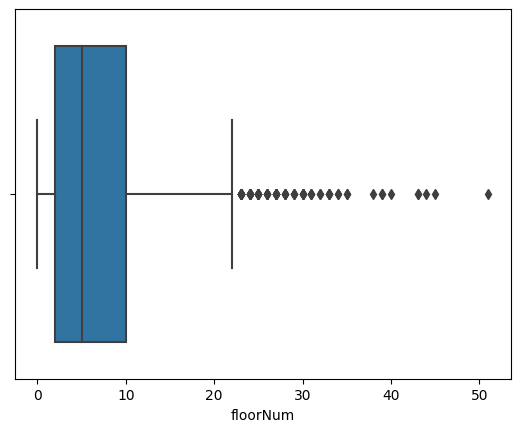

In [12]:
sns.boxplot(x=train_df['floorNum'])

In [13]:
def category_floor(score):
    if 0 <= score < 2:
        return 'Low Floor'
    elif 3 <= score <10:
        return "Med Floor"
    elif 10 <= score < 51:
        return 'High Floor'
    else:
        return None

In [14]:
train_df['floor_category']=train_df['floorNum'].apply(category_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_score,luxaury_category,floor_category
0,flat,sector 49,1.69,3,3,3,3.0,Moderately Old,2178.0,0,0,0,1,0,0,136,Medium,Med Floor
1,flat,sector 99a,1.10,2,2,3,9.0,New Property,1368.0,1,0,0,0,0,0,88,Medium,Med Floor
2,flat,sector 48,6.25,3,5,3+,5.0,Moderately Old,3200.0,0,1,0,0,0,2,49,Low,Med Floor
3,flat,sector 81,2.35,3,3,3+,14.0,Relatively New,1550.0,1,1,0,1,1,1,49,Low,High Floor
4,house,sector 4,0.67,3,2,1,1.0,Moderately Old,783.0,0,0,0,1,1,0,19,Low,Low Floor


In [16]:
train_df.drop(columns=['floorNum','luxaury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_category,floor_category
0,flat,sector 49,1.69,3,3,3,Moderately Old,2178.0,0,0,0,1,0,0,Medium,Med Floor
1,flat,sector 99a,1.10,2,2,3,New Property,1368.0,1,0,0,0,0,0,Medium,Med Floor
2,flat,sector 48,6.25,3,5,3+,Moderately Old,3200.0,0,1,0,0,0,2,Low,Med Floor
3,flat,sector 81,2.35,3,3,3+,Relatively New,1550.0,1,1,0,1,1,1,Low,High Floor
4,house,sector 4,0.67,3,2,1,Moderately Old,783.0,0,0,0,1,1,0,Low,Low Floor


In [21]:
# create a copy of dataset
#Apply label encoding to categorical columns
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded=train_df.copy()

categorical_cols= train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe=OrdinalEncoder()
    data_label_encoded[col]=oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [22]:
# seperated Data into the train and test split
X_label=data_label_encoded.drop('price',axis=1)
y_label=data_label_encoded['price']

In [23]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_category,floor_category
0,0.0,57.0,3,3,3.0,0.0,2178.0,0,0,0,1,0,0,2.0,2.0
1,0.0,111.0,2,2,3.0,1.0,1368.0,1,0,0,0,0,0,2.0,2.0
2,0.0,56.0,3,5,4.0,0.0,3200.0,0,1,0,0,0,2,1.0,2.0
3,0.0,94.0,3,3,4.0,3.0,1550.0,1,1,0,1,1,1,1.0,0.0
4,1.0,49.0,3,2,1.0,0.0,783.0,0,0,0,1,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,8.0,3,4,4.0,3.0,2000.0,0,1,0,0,0,0,0.0,0.0
3542,0.0,41.0,3,2,4.0,1.0,1409.0,0,0,0,0,0,0,1.0,0.0
3543,0.0,107.0,3,4,2.0,3.0,1475.0,0,0,0,0,0,0,2.0,1.0
3544,0.0,45.0,3,3,4.0,3.0,1845.0,1,1,0,0,1,0,1.0,3.0


# Technique 1-Correlaion Analsis

<Axes: >

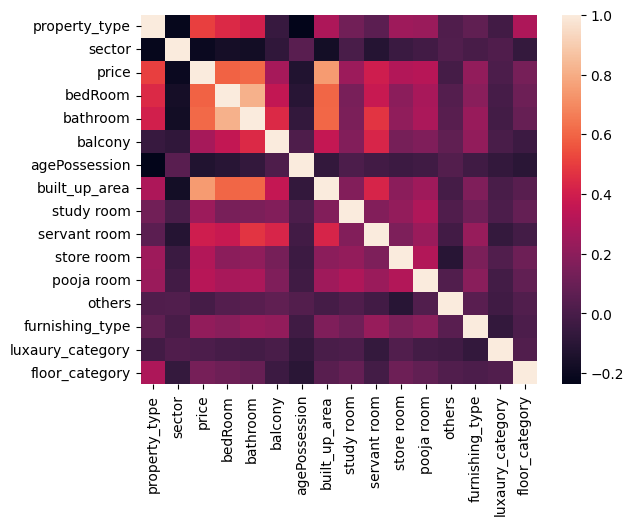

In [26]:
sns.heatmap(data_label_encoded.corr())

In [27]:
fi_df1=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})

In [28]:
fi_df1

,feature,corr_coeff
0,sector,-0.200231
1,price,1.000000
2,bedRoom,0.589697
3,bathroom,0.608622
4,balcony,0.270069
5,agePossession,-0.129649
6,built_up_area,0.748217
7,study room,0.244133
8,servant room,0.391594
9,store room,0.306635


# Technique 2 - RandomForest Feature Importance

In [35]:
from sklearn.ensemble import RandomForestRegressor

# training feature importance score for label encoded data
rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_label,y_label)

# Extracting Feature Importance score for label encoded data

fi_df2=pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649285
1,sector,0.104773
0,property_type,0.102847
2,bedRoom,0.025115
3,bathroom,0.024871
8,servant room,0.018584
5,agePossession,0.014330
4,balcony,0.011973
14,floor_category,0.010405
7,study room,0.008874


In [36]:
# Technique 3- Gradient Boosting Feature importance

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# training feature importance score for label encoded data
gb_label=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_label.fit(X_label,y_label)

# Extracting Feature Importance score for label encoded data

fi_df3=pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.684038
1,sector,0.104200
0,property_type,0.097831
3,bathroom,0.034406
2,bedRoom,0.033842
8,servant room,0.023385
9,store room,0.008793
5,agePossession,0.005135
7,study room,0.003736
4,balcony,0.001746


# Technique 4 - Permutatimon Importance

In [38]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.669302
0,property_type,0.248708
1,sector,0.148789
8,servant room,0.025773
2,bedRoom,0.019929
3,bathroom,0.012580
4,balcony,0.005844
7,study room,0.005784
14,floor_category,0.001484
12,furnishing_type,0.001394


In [39]:
# Technique 5- LASSO

In [40]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_label)

lasso=Lasso(alpha=0.01,random_state=42)  #used alpha(the regularization strength) small 
lasso.fit(X_scaled,y_label)

fi_df5=pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510001
0,property_type,0.698904
3,bathroom,0.280548
9,store room,0.199923
7,study room,0.177243
8,servant room,0.167760
12,furnishing_type,0.135054
10,pooja room,0.077880
13,luxaury_category,0.050503
14,floor_category,0.019814


In [42]:
# Technique 6 - RFE(Recursive Feature Elemination)

In [45]:
from sklearn.feature_selection import RFE

estimator=RandomForestRegressor()

selector_label=RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
selector_label=selector_label.fit(X_label,y_label)

selected_features=X_label.columns[selector_label.support_]

selected_coefficients=selector_label.estimator_.feature_importances_

fi_df6=pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.654159
0,property_type,0.104610
1,sector,0.099780
3,bathroom,0.024829
2,bedRoom,0.022865
8,servant room,0.018234
5,agePossession,0.013934
4,balcony,0.011693
14,floor_category,0.010863
7,study room,0.008805


In [46]:
# Technique 7- Linear Regression Weights

In [55]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)


fi_df7=pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=True)
fi_df7

,feature,reg_coeffs
4,balcony,-0.068319
1,sector,-0.061593
5,agePossession,-0.034371
11,others,-0.021372
2,bedRoom,0.018939
14,floor_category,0.026807
13,luxaury_category,0.060960
10,pooja room,0.081477
12,furnishing_type,0.144537
8,servant room,0.177073


In [56]:
!pip install shap

   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   -------- ------------------------------- 102.4/455.5 kB 2.0 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/455.5 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 455.5/455.5 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
ydata-profiling 0.0.dev0 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [60]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.50885213,  0.1991287 , -0.02034044, ..., -0.02488874,
        -0.03482234, -0.04529681],
       [-0.23042256, -0.52696417, -0.04662182, ..., -0.00362006,
        -0.00454988, -0.01295424],
       [-1.20777146,  0.54202792,  0.05483824, ...,  0.04980981,
         0.00821637, -0.02271317],
       ...,
       [-0.21244065, -0.5262958 , -0.0021768 , ..., -0.00394824,
         0.00521887,  0.04346693],
       [-0.41676187, -0.07207491, -0.02739958, ..., -0.01515831,
        -0.00455832, -0.05490967],
       [-0.52670865, -0.13802196, -0.02202867, ..., -0.00471308,
        -0.00386949, -0.0497029 ]])

In [58]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.246346
0,property_type,0.468070
1,sector,0.379604
3,bathroom,0.115558
8,servant room,0.084528
2,bedRoom,0.051441
4,balcony,0.039482
14,floor_category,0.031440
5,agePossession,0.024257
7,study room,0.022744


In [71]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [72]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200231,0.104773,0.104200,0.148789,-0.052853,0.099780,-0.061593,0.379604
bedRoom,0.589697,0.025115,0.033842,0.019929,0.016338,0.022865,0.018939,0.051441
bathroom,0.608622,0.024871,0.034406,0.012580,0.280548,0.024829,0.287016,0.115558
balcony,0.270069,0.011973,0.001746,0.005844,-0.044801,0.011693,-0.068319,0.039482
agePossession,-0.129649,0.014330,0.005135,-0.000425,-0.027234,0.013934,-0.034371,0.024257
built_up_area,0.748217,0.649285,0.684038,0.669302,1.510001,0.654159,1.513619,1.246346
study room,0.244133,0.008874,0.003736,0.005784,0.177243,0.008805,0.184960,0.022744
servant room,0.391594,0.018584,0.023385,0.025773,0.167760,0.018234,0.177073,0.084528
store room,0.306635,0.007942,0.008793,-0.000531,0.199923,0.006799,0.203656,0.017134


In [82]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [83]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area       0.713828
sector              0.139006
bathroom            0.032754
bedRoom             0.027677
servant room        0.027392
balcony             0.010811
agePossession       0.009703
floor_category      0.008476
study room          0.008279
store room          0.006781
furnishing_type     0.005127
luxaury_category     0.00481
pooja room          0.003604
others              0.001751
dtype: object

In [84]:
# drop pooja room,others

In [85]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_category,floor_category
0,0.0,57.0,3,3,3.0,0.0,2178.0,0,0,0,1,0,0,2.0,2.0
1,0.0,111.0,2,2,3.0,1.0,1368.0,1,0,0,0,0,0,2.0,2.0
2,0.0,56.0,3,5,4.0,0.0,3200.0,0,1,0,0,0,2,1.0,2.0
3,0.0,94.0,3,3,4.0,3.0,1550.0,1,1,0,1,1,1,1.0,0.0
4,1.0,49.0,3,2,1.0,0.0,783.0,0,0,0,1,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,8.0,3,4,4.0,3.0,2000.0,0,1,0,0,0,0,0.0,0.0
3542,0.0,41.0,3,2,4.0,1.0,1409.0,0,0,0,0,0,0,1.0,0.0
3543,0.0,107.0,3,4,2.0,3.0,1475.0,0,0,0,0,0,0,2.0,1.0
3544,0.0,45.0,3,3,4.0,3.0,1845.0,1,1,0,0,1,0,1.0,3.0


In [86]:
# applying random forest regressor to check importance of pooja room and others column

from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=42)

scores=cross_val_score(rf,X_label,y_label,cv=5,scoring='r2')


In [88]:
scores.mean()

0.8100458319649423

In [89]:
scores=cross_val_score(rf,X_label.drop(columns=['pooja room','others']),y_label,cv=5,scoring='r2')

In [91]:
scores.mean()

0.8126268685025945

In [92]:
export_df=X_label.drop(columns=['pooja room','others'])
export_df['price']=y_label

In [93]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index=False)

In [97]:
export_df.sample(10)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type,luxaury_category,floor_category,price
1469,1.0,30.0,5,5,2.0,2.0,1450.0,0,0,0,2,1.0,2.0,2.70
234,0.0,75.0,3,3,4.0,1.0,1556.0,0,0,1,2,2.0,1.0,1.95
1305,0.0,75.0,3,3,3.0,3.0,1833.0,0,1,0,2,2.0,1.0,2.00
2184,0.0,75.0,3,3,3.0,4.0,1828.0,0,0,0,0,2.0,0.0,3.00
294,0.0,46.0,3,3,2.0,3.0,1185.0,0,0,0,1,1.0,0.0,0.90
2539,0.0,10.0,3,4,4.0,3.0,1186.0,1,1,0,0,0.0,2.0,1.25
1055,0.0,9.0,3,2,1.0,3.0,1111.0,0,0,0,0,1.0,1.0,0.42
537,0.0,10.0,3,3,3.0,3.0,1650.0,0,1,0,2,0.0,0.0,1.15
2505,0.0,99.0,4,5,4.0,3.0,2545.0,0,0,0,0,2.0,2.0,2.20
639,1.0,33.0,6,8,4.0,0.0,4500.0,1,1,1,2,2.0,2.0,19.00
